# Customer Churn Prediction at SyriaTel 

## Business Understanding

### Overview
- Customer Churn is the rate at which customers stop doing business with a company. We seek to predict customer churn for SyriaTel using historical usage and customer service data. By leveraging classification models, we aim to detect patterns that distinguish churners from loyal customers. The end goal is to empower the business with proactive strategies to reduce churn and retain high-value customers. The full machine learning lifecycle is followed—from problem framing and data exploration to model development and business recommendations.

#### Problem statement
- SyriaTel wants to understand and reduce customer churn. The company needs a way to identify customers who are likely to leave so that appropriate interventions can be applied (e.g. loyalty programs, special offers).
#### Stakeholders:
- Retention and Marketing Teams: need precise predictions to launch targeted retention campaigns.

- Executives: seek KPIs around churn mitigation and revenue protection.
#### Success Criteria: 
- High recall and precision for identifying churners.
- Interpretability to ensure actionable strategies.
- Practical business recommendations derived from model output.

## Data Understanding

In [1]:
# Imports relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
# Load Data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# 3. Display the first few rows of the DataFrame
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Display summary statistics of the DataFrame
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Display the shape of the DataFrame
df.shape

(3333, 21)

The dataset includes 3,333 customers with features such as:

- Demographics: state, area code

- Service details: international plan, voice mail plan

- Usage metrics: daily, evening, night, and international minutes, calls, and charges

- Support history: number of customer service calls

- Target variable: churn



## Data Preprocessing

### Data Cleaning
- Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values.

In [6]:
# Drop irrelevant columns
df = df.drop(["phone number", "area code"], axis=1)

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


There are no duplicated rows in the data.

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


There are no missing values in the data.

In [9]:
# Encode categorical variables
binary_cols = ["international plan", "voice mail plan"]
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1})

# Encode state with LabelEncoder
le = LabelEncoder()
df["state"] = le.fit_transform(df["state"])

##### Steps Taken:
1. Cleaning:
- Dropped phone number and area code as they have no predictive values.

- Checked and confirmed no duplicates or missing values.

2. Encoding:
- Binary features like international plan and voice mail plan are encoded into 0/1.

- The state column is label-encoded to numeric form.

### Exploratory Data Analysis

#### Univariate Analysis

##### 1. Categorical Feature Distribution

We'll start by visualizing the distribution of key categorical features using pie charts for a more visual representation of proportions.

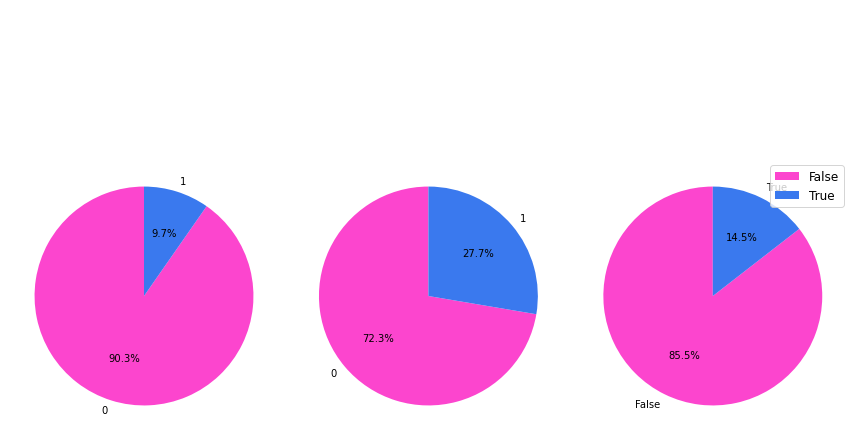

In [10]:
#Plotting the distribution of categorical features
cat_features = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for i, col in enumerate(cat_features):
    proportions = df[col].value_counts(normalize=True)
    labels = proportions.index.map(str)
    axes[i].pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90, colors = ["#fc45ce","#3a79ee"])
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14, fontweight='bold', color='white')

plt.legend(loc= 'upper right', fontsize=12)
plt.suptitle('Categorical Feature Distribution', fontsize=16, fontweight='bold', color='white')
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

##### Observations:
- Most customers do not subscribe to the international or voicemail plan.

- Churned customers represent a small minority, confirming a class imbalance issue.

##### 2. Numerical Feature Distribution

We’ll explore numerical features using ridge plots for more layered insight into their distributions.

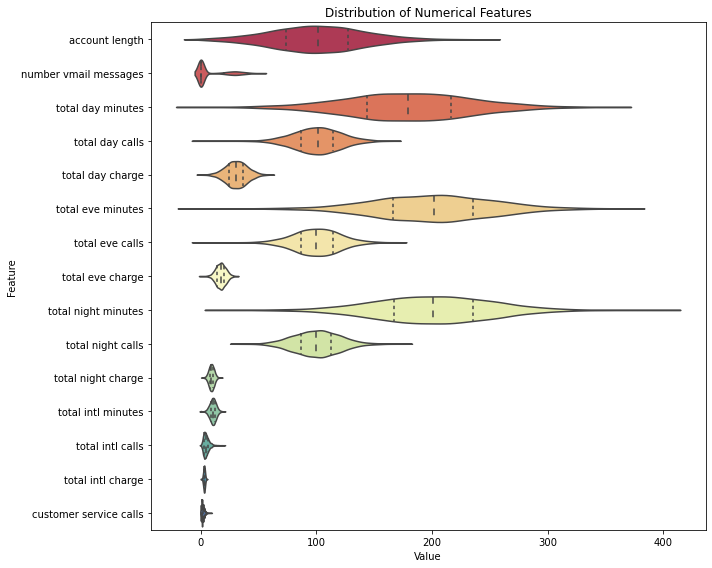

In [11]:

# Exclude some non-numeric columns and target
num_columns = df.drop(columns=['phone number', 'state', 'churn', 'international plan', 'voice mail plan'], errors='ignore').select_dtypes(include=['int64', 'float64']).columns

# Create a melt DataFrame for seaborn
df_melted = df[num_columns].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 8))
sns.violinplot(data=df_melted, x='Value', y='Feature', palette='Spectral', scale='width', inner='quartile')
plt.title('Distribution of Numerical Features')
plt.tight_layout()
plt.show()


##### Observations:
- Account length is symmetrically distributed, suggesting a stable average customer lifespan.

- Voicemail messages are mostly zero, highlighting limited use.

- Distributions of minute and charge-based features are quite similar and normally shaped.

- Customer service calls show a right-skew with a few customers calling frequently—a potential churn signal.

#### Multivariate Analysis

##### 3. Churn Distribution by Plan Subscription
Here, we analyze how subscription to specific services relates to churn using grouped bar charts.

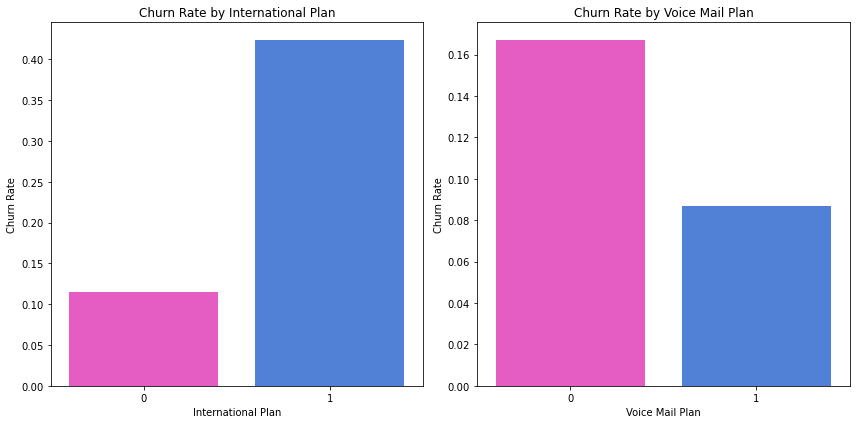

In [12]:
#Plotting the churn rate by categorical features
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, feature in enumerate(['international plan', 'voice mail plan']):
    sns.barplot(data=df, x=feature, y='churn', estimator=lambda x: sum(x)/len(x), ci=None, ax=axes[i], palette=["#fc45ce", "#3a79ee"])
    axes[i].set_title(f'Churn Rate by {feature.title()}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].set_xlabel(feature.title())

plt.tight_layout()
plt.show()


##### Key Insights:
- Churn is more prevalent among users with the international plan, potentially due to cost sensitivity.

- Customers with a voice mail plan exhibit a lower churn rate, possibly indicating higher engagement.



##### 4. Numerical Features vs. Churn
We now explore numerical features by churn class using box plots for visual granularity.

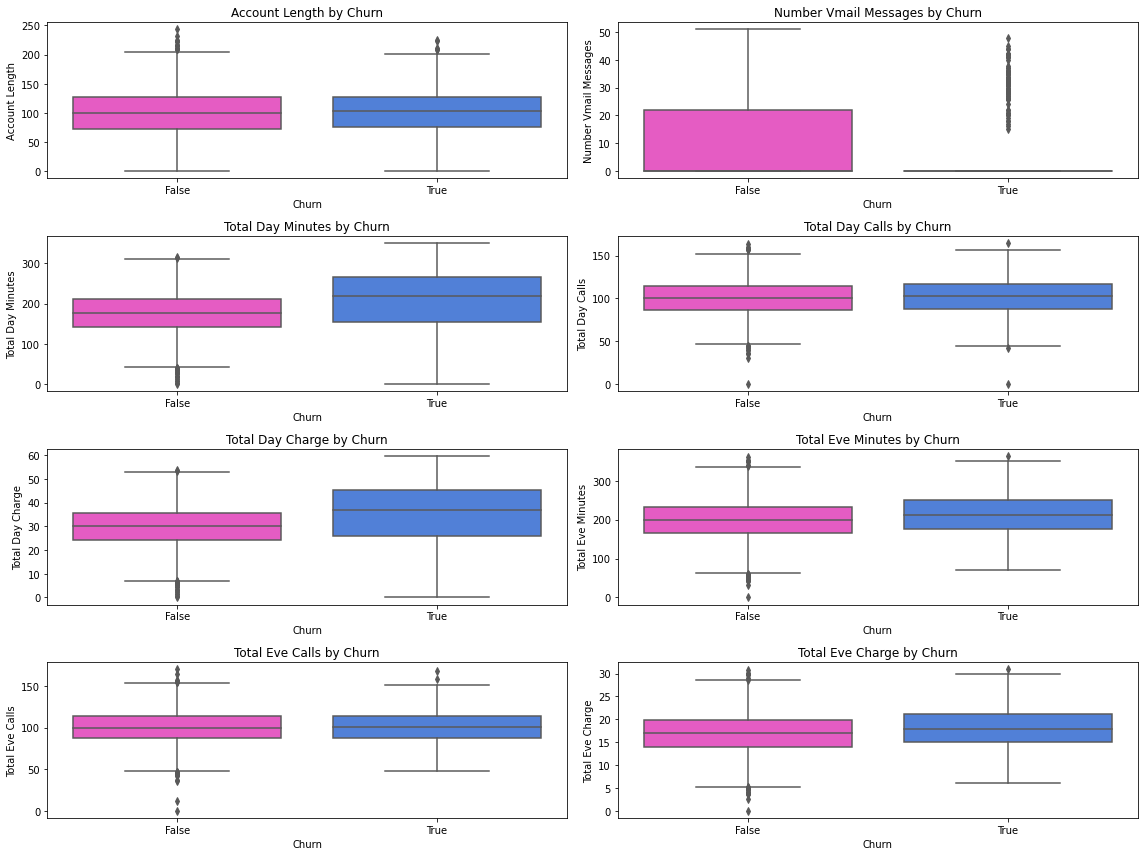

In [13]:
# Plotting the distribution of numerical features by churn
fig, axes = plt.subplots(4, 2, figsize=(16, 12))

for i, col in enumerate(num_columns[:8]):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i // 2, i % 2], palette=["#fc45ce", "#3a79ee"])
    axes[i // 2, i % 2].set_title(f'{col.title()} by Churn')
    axes[i // 2, i % 2].set_xlabel('Churn')
    axes[i // 2, i % 2].set_ylabel(col.title())

plt.tight_layout()
plt.show()

##### Analysis:
- Total charges and minutes are slightly higher for churners.

- Customer service calls show a strong positive correlation with churn.

- Voicemail message counts are low overall but even lower among churners.

#### Correlation Analysis

##### 5. Correlation Heatmap & Redundancy Reduction
We’ll analyze correlation among features to identify multicollinearity.

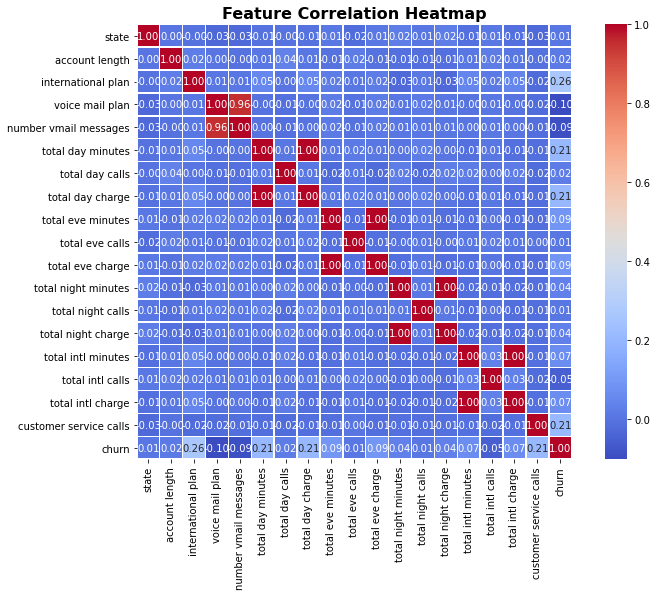

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [15]:
# Drop highly correlated pairs
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)]

print("Highly correlated columns to drop:", drop_cols)

df.drop(columns=drop_cols, inplace=True)


Highly correlated columns to drop: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


##### Interpretation: 
- Total minutes and charges are almost perfectly correlated → keeping only one avoids redundancy.

- Customer service calls, international plan, and total day minutes have stronger relationships with churn.

#### Train Test Split

In [16]:

# Separate target variable and features
X = df.drop("churn", axis=1)
y = df["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Class Imbalance Problem - SMOTE
In our dataset, the churn variable is highly imbalanced—non-churned customers dominate the dataset. This imbalance may bias models like Logistic Regression, which tend to favor the majority class, leading to poor recall for churners.

To tackle this, we’ll apply SMOTE (Synthetic Minority Over-sampling Technique) on the training data. SMOTE generates new synthetic examples for the minority class based on feature similarity, helping our model better recognize patterns from limited churn cases.



In [17]:
# Identify categorical columns
categorical_features = ['international plan', 'voice mail plan']

# Apply SMOTE-N for mixed-type datasets (categorical + numerical)
smoten = SMOTE(random_state=0)
X_train_res, y_train_res = smoten.fit_resample(X_train, y_train)

# Show the new class distribution
print("Before Resampling:", y_train.value_counts().to_dict())
print("After Resampling:", y_train_res.value_counts().to_dict())


Before Resampling: {False: 2280, True: 386}
After Resampling: {True: 2280, False: 2280}


##### Outcome:
- The number of churned and non-churned customers in the training set is now balanced.

- This creates a more equitable training environment for classification models.

#### Feature Standardization
Scaling is vital when dealing with distance-based or regularized algorithms (like Logistic Regression, SVM, KNN). It ensures that features on different scales (e.g., call counts vs. charges) contribute proportionally to the model.

However, categorical variables encoded as binary (e.g. 0/1) should remain untouched.



In [18]:
# Separate numeric and categorical features
num_features = X_train.drop(columns=categorical_features).select_dtypes(include=['int64', 'float64']).columns

# Initialize and fit scaler only on numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])
X_train_res_num_scaled = scaler.transform(X_train_res[num_features])

# Reconstruct full dataframes by re-attaching categorical columns
X_train_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features).reset_index(drop=True)
X_train_scaled[categorical_features] = X_train[categorical_features].reset_index(drop=True)

X_train_res_scaled = pd.DataFrame(X_train_res_num_scaled, columns=num_features).reset_index(drop=True)
X_train_res_scaled[categorical_features] = X_train_res[categorical_features].reset_index(drop=True)

X_test_scaled = pd.DataFrame(X_test_num_scaled, columns=num_features).reset_index(drop=True)
X_test_scaled[categorical_features] = X_test[categorical_features].reset_index(drop=True)


##### Insights:
- SMOTE effectively balanced the dataset, allowing models to learn from both churn and non-churn cases equally.

- StandardScaler was applied only to numerical variables, avoiding distortions in binary categorical features.

- The final scaled datasets are now optimized for robust, unbiased model training and evaluation.

## Predictive Modeling: Building and Evaluating Classifiers
We assess and compare the performance of 3 machine learning models designed to predict customer churn:

Logistic Regression – a linear, interpretable classifier suitable for binary classification tasks.

Decision Tree Classifier – a rule-based algorithm capable of handling non-linear relationships.

Random Forest Classifier – an ensemble method that aggregates multiple decision trees to improve accuracy and reduce overfitting.

Each model will be evaluated using classification metrics including precision, recall, F1-score, and ROC-AUC, with additional visual insights from ROC curves and feature importance rankings.

### 1. Baseline Classfication
##### Logistic Regression Model:


In [19]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res_scaled, y_train_res)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"ROC-AUC (Logistic Regression): {roc_auc_lr:.4f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.94      0.69      0.80       570
        True       0.30      0.76      0.43        97

    accuracy                           0.70       667
   macro avg       0.62      0.73      0.61       667
weighted avg       0.85      0.70      0.74       667

ROC-AUC (Logistic Regression): 0.7813


##### Logistic Regression Insights:
- Precision (Class 1): The model correctly identifies 30% of predicted churners as actual churners, which is quite low. This means many customers flagged as churners are actually not.

- Recall (Class 1): The model captures 76% of all actual churners, indicating good sensitivity. Most churners are detected.

- F1-Score (Class 1): The balance between precision and recall is moderate (F1 ≈ 0.43), showing the model is better at finding churners than precisely identifying them.

- Accuracy: The overall accuracy is 70%, but this is less meaningful due to class imbalance.

- ROC-AUC: 0.7813 – This shows the model has a fair ability to distinguish between churners and non-churners.

### 2. Rule-Based Splits
##### Decision Tree Classifier:


In [20]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_res_scaled, y_train_res)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC (Decision Tree): {roc_auc_dt:.4f}")



Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       570
        True       0.65      0.75      0.70        97

    accuracy                           0.90       667
   macro avg       0.80      0.84      0.82       667
weighted avg       0.91      0.90      0.91       667

ROC-AUC (Decision Tree): 0.8423


##### Decision Tree Classfier Insights:
- Precision (Class 1): The model correctly identifies 65% of predicted churners as actual churners, which is a substantial improvement over the baseline.

- Recall (Class 1): It captures 75% of all actual churners, showing strong sensitivity and the ability to detect most churn cases.

- F1-Score (Class 1): The balance between precision and recall is solid (F1 ≈ 0.70), indicating the model is effective at both finding and correctly identifying churners.

- Accuracy: The overall accuracy is 90%, which is high and reflects strong overall performance.

- ROC-AUC: 0.8423 – This indicates the model has a good ability to distinguish between churners and non-churners.

- The Decision Tree model achieves much higher precision (65% vs. 30%) and overall accuracy (90% vs. 70%) compared to Logistic Regression, meaning it is better at correctly identifying actual churners and overall predictions.
- Additionally, the Decision Tree's ROC-AUC score (0.8423) is notably higher than that of Logistic Regression (0.7813), indicating superior ability to distinguish between churners and non-churners.




### 3. Ensemble Model
##### Random Forest Classifier:

In [21]:

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_res_scaled, y_train_res)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC (Random Forest): {roc_auc_rf:.4f}")

Random Forest Performance:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       570
        True       0.63      0.69      0.66        97

    accuracy                           0.90       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667

ROC-AUC (Random Forest): 0.8805


##### Random Forest Insights:
- Precision (Class 1): 63%, showing good reliability in identifying actual churners.
- Recall (Class 1): 69%, indicating the model detects most churn cases but misses some.
- F1-Score: 0.66, reflecting a solid balance between precision and recall for churn prediction.
- Overall Accuracy: 90% – matches the Decision Tree, indicating strong overall performance.
- ROC-AUC: 0.8805 – higher than the Decision Tree, showing better separability between churners and non-churners.

**Comparison with Decision Tree Classifier:**
- The Random Forest achieves slightly lower precision (63% vs. 65%) and recall (69% vs. 75%) for churners compared to the Decision Tree.
- However, Random Forest outperforms the Decision Tree in ROC-AUC (0.8805 vs. 0.8423), indicating it is better at distinguishing between churners and non-churners overall.

### ROC Curve Comparison




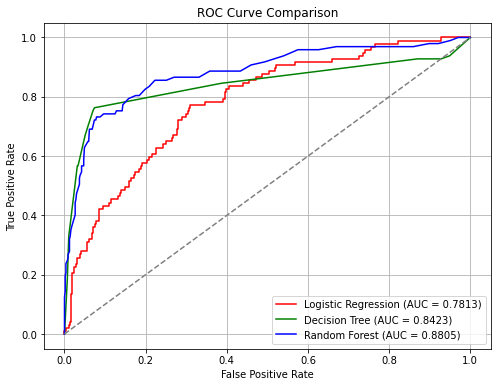

In [22]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(*roc_curve(y_test, y_proba_lr)[:2], label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='red')
plt.plot(*roc_curve(y_test, y_proba_dt)[:2], label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='green')
plt.plot(*roc_curve(y_test, y_proba_rf)[:2], label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


##### Interpretation:
- The closer the curve is to the top-left, the better. The Random Forest ROC curve dominates, confirming its superiority.

### Feature Relevance (Random Forest)


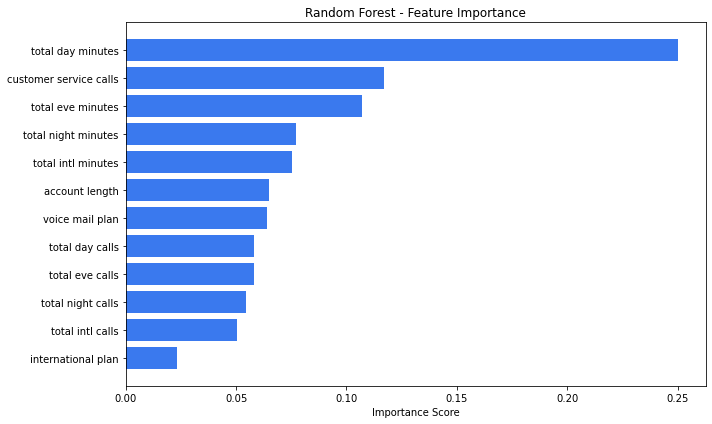

In [23]:
# Feature Importance
importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train_res_scaled.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='#3a79ee')
plt.gca().invert_yaxis()
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


##### Key Drivers of Churn:
- International plan, international minutes, and daytime minutes were top predictors.

- Lower-ranked features like night calls or voicemail showed minimal influence.



## Conclusion

##### Model Comparison
| Metric            | Logistic Regression | Decision Tree | Random Forest |
| ----------------- | ------------------- | ------------- | ------------- |
| Accuracy          | 70%                 | 90%           | **90%**       |
| Precision (Churn) | 0.30                | 0.65          | **0.63**      |
| Recall (Churn)    | **0.76**            | 0.75          | 0.69          |
| ROC-AUC           | 0.7813              | 0.8423        | **0.8805**    |

- Logistic Regression has the highest recall for churn, but much lower precision and accuracy.
 
 While its accuracy (70%) and precision (0.30) are lower, Logistic Regression achieves the highest recall (0.76), meaning it captures most churners. This model is easy to interpret and can be used for quick insights or as a baseline.

- Decision Tree is useful when interpretability is a priority.

 Decision Tree offers high accuracy (90%) and better precision (0.65) and recall (0.75) than Logistic Regression, making it suitable for generating clear decision rules and actionable business strategies.

- Random Forest provides the best balance of overall accuracy and class separability (ROC-AUC).

Random Forest provides the best overall performance, with the highest ROC-AUC (0.8805), strong accuracy (90%), and a good balance between precision (0.63) and recall (0.69) for detecting churners. This makes it the most reliable model for identifying customers at risk of churn.

## Business Recommendations
- **Retention Strategy:** Focus retention efforts on customers with frequent customer service calls and those subscribed to the international plan, as these are strong predictors of churn.
For International Plan Subscribers, review pricing, service quality, and consider targeted retention offers for this segment.

- **Customer Experience:** Proactively address issues raised during customer service interactions, since high service call frequency is closely linked to churn.

- **Voicemail Plan:** Customers without a voicemail plan show higher churn rates. Explore ways to increase engagement with this feature or bundle it with other offers.

- **Marketing Offers:** Develop targeted loyalty programs and special offers for high-usage customers, especially those with high daytime or international minutes, to reduce their likelihood of leaving.

- **Model Deployment:** Deploy the Random Forest model in your CRM system for real-time churn prediction, as it offers the best balance of accuracy and class separability.

- **Monitoring:** Regularly monitor model performance for drift and retrain the model at least quarterly to maintain prediction accuracy.


